In [ ]:
#计算描述符
from mordred import Calculator, descriptors
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
if __name__ == '__main__':
   data = pd.read_excel('FP-smiles.xlsx', header=0)
   smiles = data.iloc[:, 0].tolist()
   mol_list = [Chem.MolFromSmiles(smi) for smi in smiles]
   calc = Calculator(descriptors, ignore_3D = True)
   descriptors_df = calc.pandas(mol_list)
   print(descriptors_df)
   descriptors_df.to_csv('FP-701.csv', index=False)


           ABC      ABCGG  nAcid    SpAbs_A   SpMax_A  SpDiam_A     SpAD_A  \
0     2.121320   2.340100      0   4.472136  1.618034  3.236068   4.472136   
1     3.535534   3.869735      0   6.987918  1.801938  3.603875   6.987918   
2     4.242641   4.530950      0   8.054679  1.847759  3.695518   8.054679   
3     4.949747   5.143137      0   9.517541  1.879385  3.758770   9.517541   
4     5.656854   5.715477      0  10.627503  1.902113  3.804226  10.627503   
..         ...        ...    ...        ...       ...       ...        ...   
696  12.239595  10.064792      1  21.583437  1.991468  3.982937  21.583437   
697  13.653808  10.814137      1  24.136411  1.993169  3.986338  24.136411   
698  13.653808  10.814137      1  24.136411  1.993169  3.986338  24.136411   
699  13.653808  10.814137      1  24.136411  1.993169  3.986338  24.136411   
700  14.360915  11.173852      1  25.490990  1.993835  3.987669  25.490990   

      SpMAD_A   LogEE_A     VE1_A  ...     SRW10     TSRW10    

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   11.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   44.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:  3.2min
[Parallel(n_jobs=8)]: Done 954 out of 954 | elapsed:  4.6min finished

[2024-06-05 15:29:55] Features: 1/20 -- score: 0.5857764710430317[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    8.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   45.5s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:  3.3min
[Parallel(n_jobs=8)]: Done 953 out of 953 | elapsed:  4.7min finished

[2024-06-05 15:34:37] Features: 2/20 -- score: 0.874797486595417[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs

选中的特征：
Index(['ATS1dv', 'AATS1d', 'ATSC1Z', 'ATSC1m', 'ATSC1pe', 'ATSC8p', 'GATS2d',
       'GATS2p', 'BCUTs-1h', 'BCUTs-1l', 'nBondsA', 'C1SP1', 'NsOH', 'ECIndex',
       'ETA_beta_s', 'ETA_dPsi_B', 'SlogP_VSA3', 'nFARing', 'Radius', 'SRW03'],
      dtype='object')


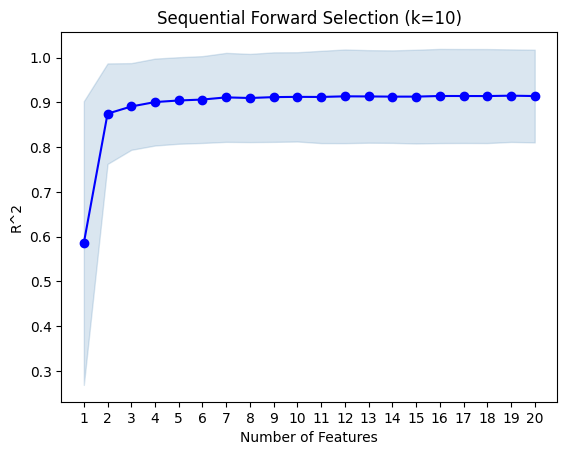

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import warnings

# Ignore warnings of type FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Generate sample data
dataset = pd.read_excel('FP-701.xlsx')
dataset = dataset.replace(np.nan, 0)
X = dataset.iloc[:, 6:2770]
Y = dataset.iloc[:, 5]
print(X)

# Set the number of parallel jobs
n_jobs = 8

# Use forward feature selection
sfs1 = SFS(RandomForestRegressor(random_state=42),
           k_features=20,
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=5,
           n_jobs=n_jobs)

try:
    # Perform feature selection
    sfs1 = sfs1.fit(np.array(X), Y)
except ValueError as e:
    print(f"Error: {e}")
    print("There may not be enough features or the model may fail to converge.")

# Get the indices of the selected features
selected_feature_idx = sfs1.k_feature_idx_
selected_features = X.columns[list(selected_feature_idx)]
print(f"Selected features:\n{selected_features}")

# Plot the sequential feature selection results
fig = plot_sequential_feature_selection(sfs1.get_metric_dict())
plt.ylabel('R^2')
plt.xlabel('Number of Features')
plt.title('Sequential Forward Selection (k=20)')
plt.show()



In [4]:
# Create a new dataframe that contains only the selected features
selected_data = dataset[selected_features]

# Save the selected features to an Excel file
selected_data.to_excel('FP-701-selected_features-cv5-20.xlsx', index=False)
